> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a TMdb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Selected Database** : [Tmdb movies](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)

**DataSet Information**: The dataset contains information about more than 10K Movies including user ratings, revenue runtime, budget.

>* In this project, I'll be answering the following questions:

1. Is there any relation between revenue,budget,popularity ? 
2. Movies with higher vote_count received a better popularity ?
3. Compare the revenue,budget per year ?
4. What is Maximum and Minimum Budget/Revenue and the difference between them?
5. Best and Worst Time to release a Movie?
6. What is the approximate runtime for majority of the movies?
---
* Average vote_count
* Mean Runtime
* Mean Budget
* Mean Revenue


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%pdb
%matplotlib inline

Automatic pdb calling has been turned ON


<a id='wrangling'></a>
## Data Wrangling - Exploring General Properties of the Dataset 

### General Properties

In [2]:
#Importing the csv file and storing it as "df"
#File has been renamed from tmdb-movies -> tmdb_movies
df = pd.read_csv('tmdb_movies.csv')
#Explorinf Collumns
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [3]:
#Finding (rows,cols) of the dataset
df.shape

(10866, 21)

This dataset includes **21** columns and **10866** rows

In [4]:
#Finding out general information about the no. of entries/ data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning - Missing / Duplicated data correction

**Checking for duplicate data and removing it**

In [5]:
#checking for total number duplicates
df.duplicated().sum()

1

In [6]:
#Dropping duplicate data
df.drop_duplicates(inplace = True)

#Verifying the data
df.duplicated().sum()

0

**Missing values interpretation**

In [7]:
#checking for null values in total per column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Removing the columns homepage, tagline, keywords, production companies reason being they have too many null values which wont help in accurate analysis and  id, imdb_id, overview, budget_adj, revenue_adj wont be needed in tha analysis. Also release_year is dropped since release date in converted to datetime and it is sort of extra and not needed

In [8]:
#Creating a list for all the columns to be deleted
drp_col = ['id','homepage', 'tagline', 'keywords', 'production_companies','imdb_id', 'overview', 'budget_adj', 'revenue_adj']
#Dropping the list
df = df.drop(drp_col, axis = 1)

In [9]:
#Checking the updated dataset with 1 entry
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015


All the columns unrequired have been removed

**Cleaning entries with 0's**

In [10]:
df.describe()
#Checking for values with 0's in it through "min"

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Columns of budget, revenue, runtime have min value = 0 which is I'll update it with the mean of the respective column

**Filling null values with the mean**

In [11]:
#Filling null values with the mean
df.fillna(df.mean(),inplace = True)

**Replacing 0's with mean**

In [12]:
#Replacing 0's on budget with mean of the budget column
df['budget'] = df['budget'].replace(0,df['budget'].mean())

In [13]:
#Replacing 0's on revenue with revenue of the budget column
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

In [14]:
#Replacing 0's on runtime with mean of the runtime column
df['runtime'] = df['runtime'].replace(0,df['runtime'].mean())

In [15]:
df.describe() #Verifying minimum values

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859
std,1.000231,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Here as we can see the min value for budget, revenue, runtime has been updated and there are no more 0's.

**Changing data type of budget and revenue column from float to int**

In [16]:
#Making a list for columns whose data types is to be changed
chng_type = ['budget', 'revenue','runtime'];
#for loop runs through the list and for every value in list it updates the datatype
for i in chng_type:
    df[i]=df[i].astype(int)

In [17]:
#Verifying data types
print(df.dtypes)

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object


I have also noticed that the release date is not in the standard format

**Converting 'release_date's data type to datetime**

In [18]:
#COverting data type of release_date to standard datetime using "to_datetime"
df['release_date'] = pd.to_datetime(df['release_date'])

**Adding Profit Column**

In [19]:
#Calculating profit from revenue - budget
proft = df['revenue'] - df['budget'];
#Adding profit column to dataset at position 3
df.insert(3,'profit',proft);

In [20]:
df.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [21]:
df.shape
#Checking for total columns

(10865, 13)

**Adding Month Column**

In [22]:
#Creating new column month from release_date
mnth = df['release_date'].apply(lambda x : x.month)
#Adding month column to data set
df.insert(10,'month',mnth)

In [23]:
df.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,month,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6,5562,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,5,6185,7.1,2015


Now that the dataset is cleaned. I'll be trying to find out the various relations between the information provided

<a id='eda'></a>
## Exploratory Data Analysis


**Following is the Histogram of all the information provided in the dataset after cleaning**

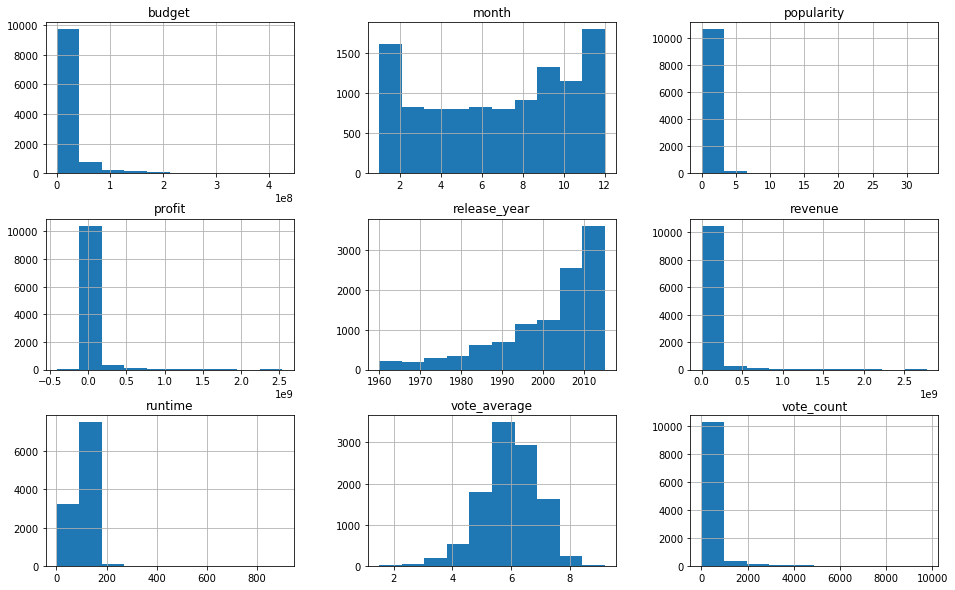

In [24]:
#PLotting histogram of all  the available data
df.hist(figsize=(16,10));

In the above histograms, we some similarities.
Below I have plotted some Scatter Plots to justify the relation between revenue, popularity and budget

### 1. Is there any relation between revenue,budget,popularity ?

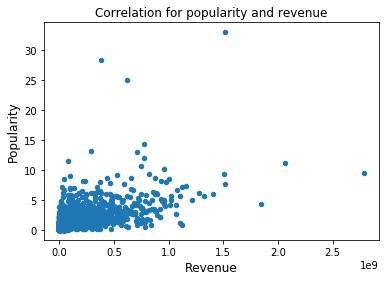

In [25]:
#Scatter Plotting
df.plot(x = "revenue", y = "popularity",kind = "scatter")
#X label
plt.xlabel('Revenue', fontsize = 12)
#y label
plt.ylabel('Popularity', fontsize = 12)
#title
plt.title('Correlation for popularity and revenue', fontsize = 12);

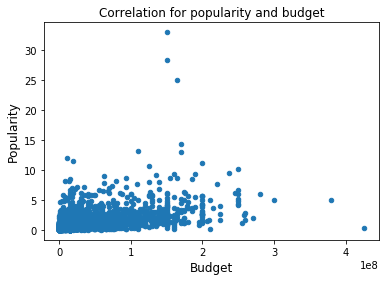

In [26]:
df.plot(x = "budget", y = "popularity",kind = "scatter")
#X label
plt.xlabel('Budget', fontsize = 12)
#y label
plt.ylabel('Popularity', fontsize = 12)
#title
plt.title('Correlation for popularity and budget', fontsize = 12);

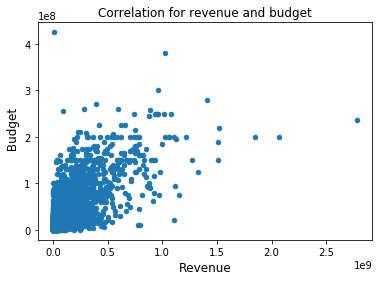

In [27]:
#Scatter Plotting
df.plot(x = "revenue", y = "budget",kind = "scatter")
#X label
plt.xlabel('Revenue', fontsize = 12)
#y label
plt.ylabel(' Budget', fontsize = 12)
#title
plt.title('Correlation for revenue and budget', fontsize = 12);

All the scatterplot show a positive correlation suggesting there a factor depending on them for the movie to be more profitable. A relation between revenue and popularity is justified suggesting more revenue when more is the popularity furthermore suggesting that the popularity doesnt depend on the budget allocated for the movie. Also the revenue earned does show positive correlation with budget suggesting that revenue earned does depend on the allocation of the budget

### 2. Movies with higher vote_count received a better popularity ?

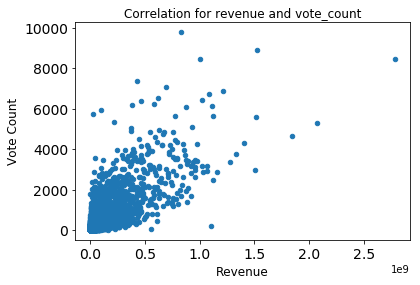

In [28]:
#Scatter Plotting
df.plot(x = "revenue", y = "vote_count",kind = "scatter", fontsize = 14)
#X label
plt.xlabel('Revenue', fontsize = 12)
#y label
plt.ylabel('Vote Count', fontsize = 12)
#title
plt.title('Correlation for revenue and vote_count', fontsize = 12);

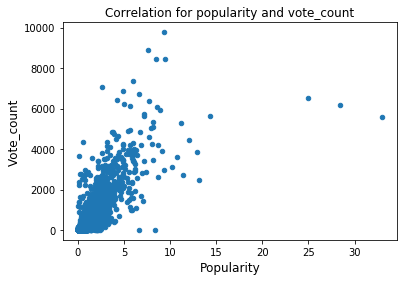

In [29]:
#Scatter Plotting
df.plot(x = "popularity", y = "vote_count",kind = "scatter")
#X label
plt.xlabel('Popularity', fontsize = 12)
#y label
plt.ylabel('Vote_count', fontsize = 12)
#title
plt.title('Correlation for popularity and vote_count', fontsize = 12);

A +ve correlation between popularity, vote_count and revenue , vote_count can be seen suggesting a relation between them but There is no conclusion regarding popularity of a movie with its revenue.

### 3. Comparison between the revenue,budget per year?

Here, I have made a separate dataframe for comparison between"profit", "budget", "revenue"
 

In [30]:
#Calculating Total Profit, Budget, Revenue per year  
df_pft = df.groupby('release_year')['profit','budget','revenue'].sum()
df_pft


,profit,budget,revenue
release_year,,,
1960,782261874,358415526,1140677400
1961,864710856,309374148,1174085004
1962,813639180,317959274,1131598454
1963,853041103,409690078,1262731181
1964,1202260219,492836027,1695096246
1965,1231700755,421187979,1652888734
1966,1162858901,554780524,1717639425
1967,1350947441,422386492,1773333933
1968,917137308,422921864,1340059172


In [31]:
#Creating a New Data Frame with Release_Year, Profit, Budget & Revenue
df1 = pd.DataFrame(df_pft, columns = ['release_year' ,'profit','budget','revenue'])

In [32]:
#Copying the index ("release_year") into a new colwmn in the new data frame
df1['release_year']=df1.index

df1.head(2)

,release_year,profit,budget,revenue
release_year,,,,
1960,1960,782261874,358415526,1140677400
1961,1961,864710856,309374148,1174085004


In [33]:
#Changing the Index from release_year to "n"
df1.index = np.arange(1, len(df1) + 1)
df1.head(2)

,release_year,profit,budget,revenue
1,1960,782261874,358415526,1140677400
2,1961,864710856,309374148,1174085004


Now that the new dataframe is ready, I'll compare them and try to confirm the relation of revenue and budget from scatterplots as well as the increase in budget & revenue since 1960's

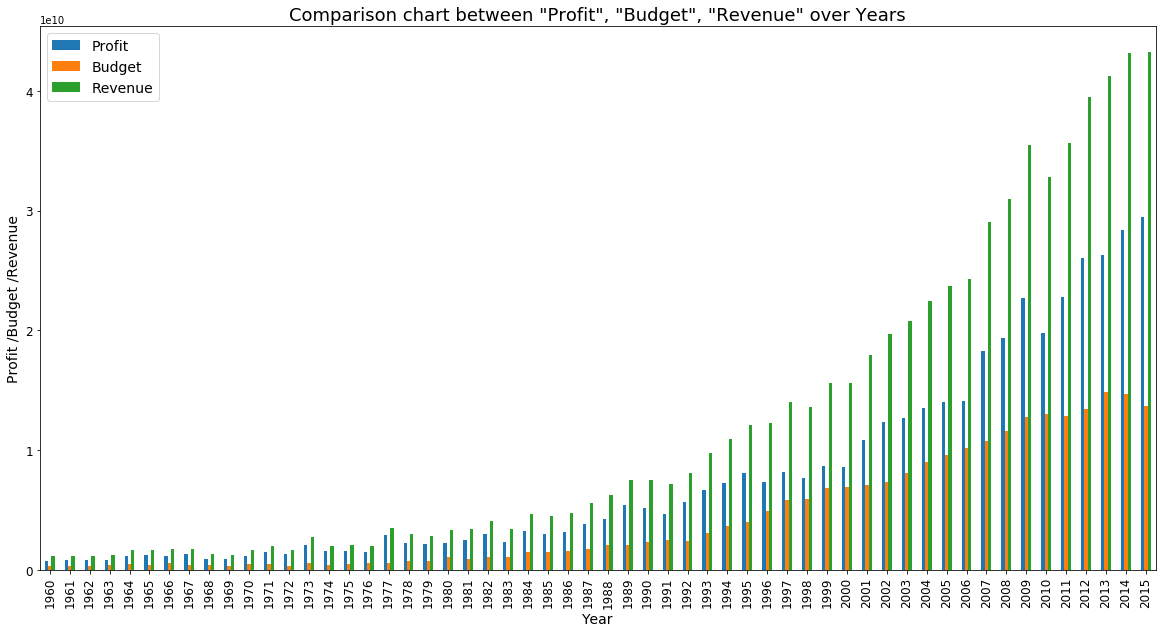

In [34]:
#Plotting a comparison chart between "profit", "budget", "revenue"
df1.plot(x="release_year", y=["profit", "budget", "revenue"], kind="bar",figsize= (20,10),fontsize = 12);
#X label
plt.xlabel('Year', fontsize = 14);
#y label
plt.ylabel('Profit /Budget /Revenue', fontsize = 14);

#legend size and info
plt.legend(["Profit", "Budget", "Revenue"],prop={"size":14})

#Title
plt.title('Comparison chart between "Profit", "Budget", "Revenue" over Years', fontsize = 18);

The bar graph shows, the increase in budget allocated as well as increase in revenue earned. Also on close view, I can confirm the relation between budget and revenue which was suggested by the scatterplots 

###  4. What is Maximum and Minimum Budget/Revenue and the difference between them?

In [35]:
dif_rev = df1['revenue'].max()- df1['revenue'].min()
print ('The difference between (Maximum & Minimum) Revenue: ',dif_rev)

The difference between (Maximum & Minimum) Revenue:  42079360112


In [36]:
dif_bud = df1['budget'].max()- df1['budget'].min()
print ('The difference between (Maximum & Minimum) Budget: ',dif_bud)

The difference between (Maximum & Minimum) Budget:  14586262895


In [37]:
df_pft.max()

profit     29486835175
budget     14895637043
revenue    43210958566
dtype: int64

In [38]:
df_pft.min()

profit      782261874
budget      309374148
revenue    1131598454
dtype: int64

The difference between (Maximum & Minimum) Budget:  *14586262895* & The difference between (Maximum & Minimum) Revenue:  *42079360112* . This confirms us how much the movie industry has grown over the years

### 5. Best and Worst Time to release a Movie?

The new column names "Month" is called and the profit column is grouped by month giving us the profit made in each of the 12 months

In [39]:
#Calculating Profits made in the month movie is released from the month column
mnth_rel = df.groupby('month')['profit'].sum()
mnth_rel

month
1     23047879284
2     20097198960
3     30948095072
4     27724574740
5     45974589470
6     54255297372
7     40925360347
8     26685428542
9     31594889601
10    34686650439
11    42257849808
12    51927217431
Name: profit, dtype: int64

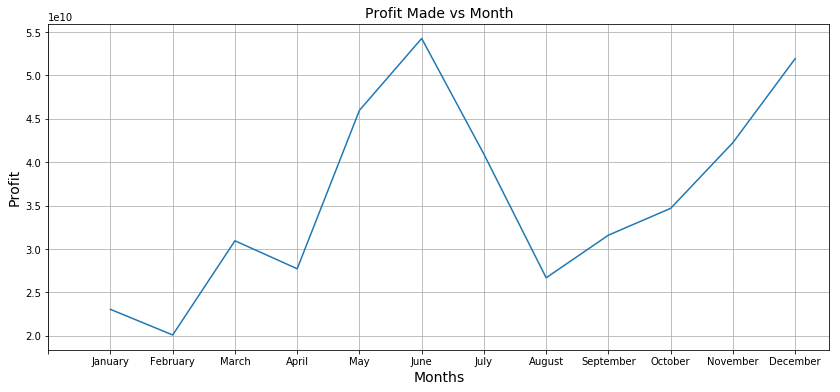

In [40]:
#PLotting a line graph with size (14,6) using matplotlib
plt.figure(figsize=(14,6))
#creating labels
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
#plotting
plt.plot(labels,mnth_rel);
#Plotting x label as Months
plt.xticks(np.arange(13), calendar.month_name[0:13])
#X Axis Label
plt.xlabel('Months', fontsize=14)
#Y Axis Label
plt.ylabel('Profit', fontsize=14)
#Title
plt.title('Profit Made vs Month', fontsize = 14)
#Gridplot
plt.grid()
plt.show()

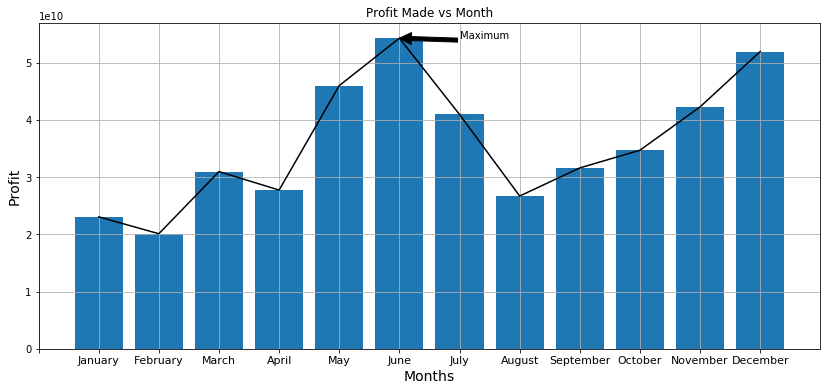

In [41]:
#PLotting a bar graph with size (14,6) using matplotlib
plt.figure(figsize=(14,6))
#creating labels
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
#plottin
plt.bar(labels,mnth_rel);
plt.plot(labels,mnth_rel, color = '#000000');
#Plotting x label as Months
plt.xticks(np.arange(13), calendar.month_name[0:13], fontsize=11)
#X Axis Label
plt.xlabel('Months', fontsize=14)
#Y Axis Label
plt.ylabel('Profit', fontsize=14)
#Title
plt.title('Profit Made vs Month')
plt.annotate('Maximum', xy=(6, 54255297372), xytext=(7,54255297372),
             arrowprops=dict(facecolor='black'),
             )
#Gridplot
plt.grid()
plt.show()

1. As the bar and line graph shows movies which release in **JUNE** followed by **DECEMBER** and **MAY** are most profitable and it is the best time to release a movie
2. Similary the month of **MARCH** is the worst time to release any movie and also the time of **AUGUST & SEPTEMBER** since there is a huge downfall in profits

### 6. What is the approximate runtime for majority of the movies?

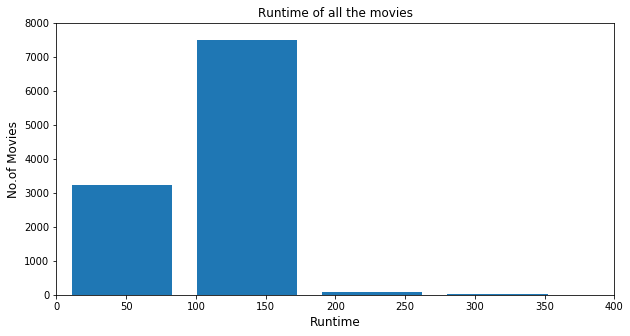

In [42]:
#Plotting Histogram

#giving the figure size
plt.figure(figsize=(10,5))

#On x-axis 
plt.xlabel('Runtime', fontsize = 12)
#On y-axis 
plt.ylabel('No.of Movies', fontsize = 12)
#Name of the graph
plt.title('Runtime of all the movies', fontsize = 12)

#PLotting Histogram
plt.hist(df['runtime'],rwidth = 0.8)
plt.axis([0, 400, 0, 8000])
#Display
plt.show()

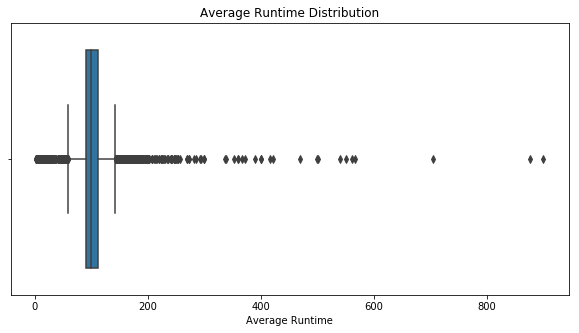

In [43]:
# Setting size for plot
ax = plt.figure(figsize=(10,5))
#Plotting Box Graph
ax = sns.boxplot(df.runtime)
#Labelling
ax.set(xlabel='Average Runtime', title = 'Average Runtime Distribution')
plt.show()

In [44]:
#For Runtime Description
df['runtime'].describe()

count    10865.000000
mean       102.362816
std         30.904045
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

* From runtime description and the above histogram we can confirm that More than 75% of movies have runtime lesser than 111 minutes

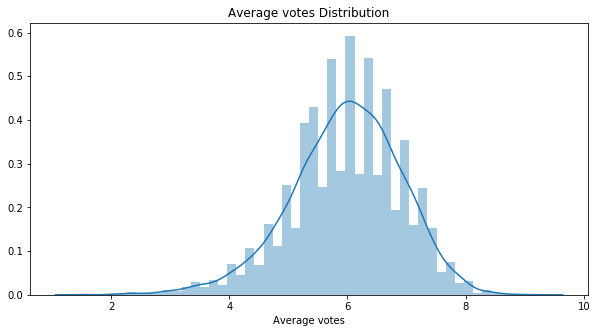

In [45]:
# Setting size for plot
ax = plt.figure(figsize=(10,5))
#Plotting Dist Graph
ax = sns.distplot(df.vote_average)
#Labelling
ax.set(xlabel='Average votes', title = 'Average votes Distribution')
plt.show()

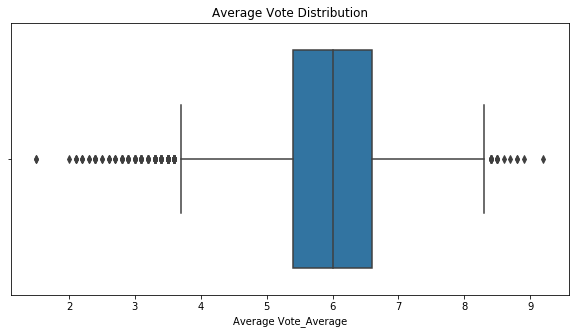

In [46]:
# Setting size for plot
ax = plt.figure(figsize=(10,5))
#Plotting Box Graph
ax = sns.boxplot(df.vote_average)
#Labelling
ax.set(xlabel='Average Vote_Average', title = 'Average Vote Distribution')
plt.show()

Majority of the votes to the movies is between **4 & 8** with maximum peak around **6**

### Mean Runtime is ?

In [47]:
#Printing Average Runtime
print('Mean Runtime: ', df['runtime'].mean())

Mean Runtime:  102.362816383


### Mean Budget is ?

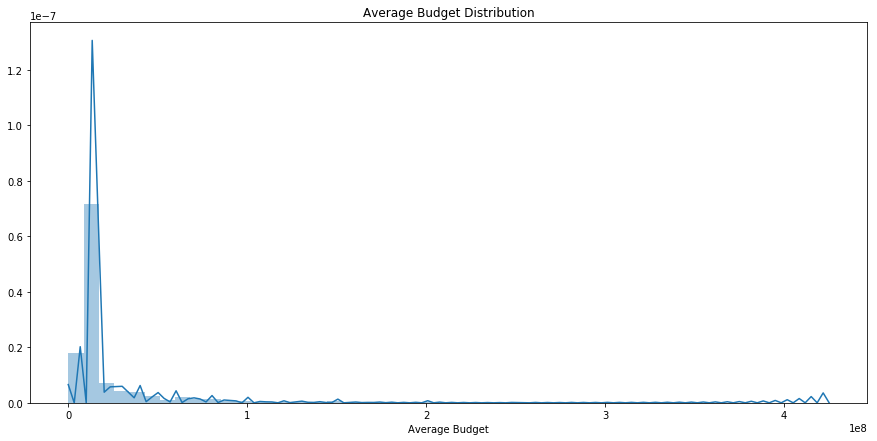

In [48]:
# Setting size for plot
ax = plt.figure(figsize=(15,7))
#Plotting Dist Graph
ax = sns.distplot(df.budget)
#Labelling
ax.set(xlabel='Average Budget', title = 'Average Budget Distribution')
plt.show()

In [49]:
print('Mean Budget: ', df['budget'].mean())

Mean Budget:  22291099.9673


### Mean Revenue is ?

In [50]:
print('Mean Revenue: ', df['revenue'].mean())

Mean Revenue:  61879229.8399


### Vote_Average Box Plot

<a id='conclusions'></a>
## Conclusions

1. A positive correlation can be said between the revenue, budget and popularity and also between popularity and vote_count which aims that movies with higher budget, popularity tend to make more revenue also.
2. There is no conclusion regarding popularity of a movie with its revenue.
3. I can conclusively say that the budget allocated, revenue generated have increased drastically since **1960's** . 
4. Maximum Profit Generated in a Year = **29486835175**
5. Maximum Budget Allocation in a Year= **14895637043**
6. Maximum Revenue Generated in a Year= **43210958566**
7. Minimum Profit Generated in a Year = **782261874**
8. Minimum Budget Allocation in a Year= **309374148**
9. Minimum Revenue Generated in a Year= **1131598454**
10. The difference between (Maximum & Minimum) Revenue:  **42079360112**
11. The difference between (Maximum & Minimum) Budget:  **14586262895**
10. Best time to release a movie(in order) = **JUNE DECEMBER MAY** 
11. Worst time to release a movie(in order) = **MARCH AUGUST & SEPTEMBER** since there is a huge downfall in profits
12. Mean Runtime movie: 102 minutes and 75% of movies have runtime lesser than 111 minutes
13. Majority of the votes to the movies is between *4 & 8* with maximum peak around **6**
14. Mean Budget:  **22291099.9673**
15. Mean Revenue:  **61879229.8399**


## Limitations
Dataset had null values as well as 0's in it which may lead to inaccuracy. This analysis may not be very accurate because of the Null values and 0's become a big obstacle and hindered the analysis while calculating the profit, budget, revenue, vote_count, popularity, etc. Which were filled with mean of each columns resp. to avoid any further obstacles.


## References
1. [Size in matplotlib](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
2. [Calender](https://stackoverflow.com/questions/41366720/calendar-module-in-python-not-working)
3. [Seaborn Distplot](https://pythonbasics.org/seaborn-distplot/)
4. [Xticks](https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib/42888374)
5. [Figsize](https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib)

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0